# INTRODUCTION


NYC has long struggled with public schools meeting state and federal expectations (New York Times, 2019). The state is consistently having to close schools that are not meeting state standards. Using the results from this research teachers, educators, policy makers, etc. will have a starting point to identify areas of concern and growth compared to the other Boroughs.

This project will analize the average math scores on the state test between the 5 boroughs. The goal of the project is to determine if there is a stastical differnece between any of the the neighboorhoods.



NYT ARTICLE:https://www.nytimes.com/2019/08/22/nyregion/new-york-city-school-test-scores.htm

# Hypothesis 
H0: There is no statistically significant difference in the performance on the math test between the boroughs 

Ha: There is a statistically significant difference in the performance on the math test between the boroughs

# DATA 

The data has been obtained from data.gov and includes information about the math test scores of students in grades 3-8 from 2006 to 2012.

There are 420 total observations recored over this 6 year period, or 84 obersations per Borough.

 There is no missing or null data that will need to be cleaned before conducting the research. As there are no missing values in the raw data, it can be assumed the data was cleaned before being uploaded. The methods for cleaning the data are unknown and could lead to some discovered/hidden bias in the results.
 
 The data distriubtion of mean scores on the math test, for each borough, is shown below. A brief summary of the dataframe created via Pandas is included as well.

 

The original dataset is linked here: https://catalog.data.gov/dataset/2006-2012-math-test-results-district-all-students



l



In [ ]:
# Setting up Python Environment
import pandas as pd 
from matplotlib import pyplot as plt
from scipy import stats
from google.colab import files
import seaborn as sns
uploaded = files.upload()


Saving 2006_-_2012_Math_Test_Results_-_Borough_-_SWD.csv to 2006_-_2012_Math_Test_Results_-_Borough_-_SWD.csv


<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 475
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Borough            420 non-null    object 
 1   Grade              420 non-null    object 
 2   Year               420 non-null    int64  
 3   Demographic        420 non-null    object 
 4   Number Tested      420 non-null    int64  
 5   Mean Scale Score   420 non-null    int64  
 6   Num Level 1        420 non-null    int64  
 7   Pct Level 1        420 non-null    float64
 8   Num Level 2        420 non-null    int64  
 9   Pct Level 2        420 non-null    float64
 10  Num Level 3        420 non-null    int64  
 11  Pct Level 3        420 non-null    float64
 12  Num Level 4        420 non-null    int64  
 13  Pct Level 4        420 non-null    float64
 14  Num Level 3 and 4  420 non-null    int64  
 15  Pct Level 3 and 4  420 non-null    float64
dtypes: float64(5), int64(8), o

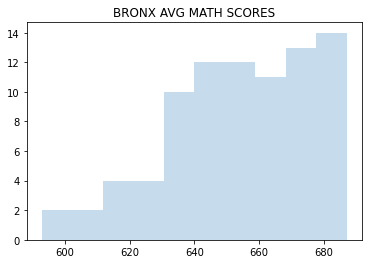

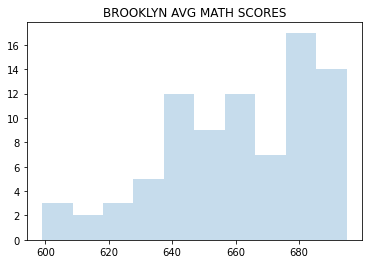

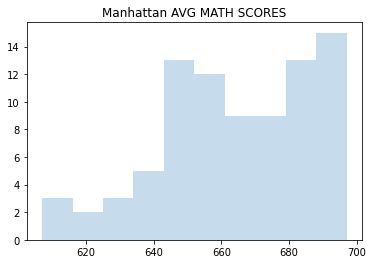

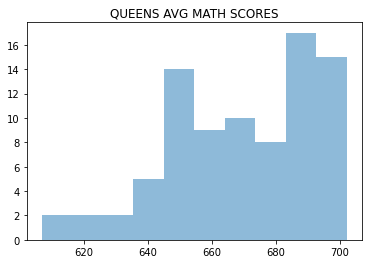

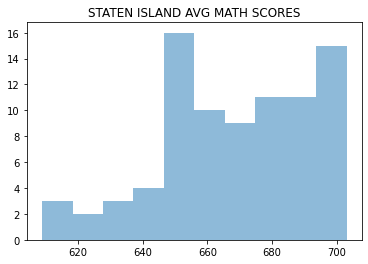

<Figure size 432x288 with 0 Axes>

In [ ]:
#Importing DATA and more Environemental Setup
import io 
test = pd.read_csv(io.BytesIO(uploaded['2006_-_2012_Math_Test_Results_-_Borough_-_SWD.csv']))
test = test[(test['Grade'] != "All Grades")]

import numpy as np
import math as math


# Priting Column Information:
test.info()
test.head()

# Filter Data by Borough
bronx = test[(test['Borough']=='BRONX')]
brooklyn  = test[(test['Borough']=='BROOKLYN')]
manhattan = test[(test['Borough']=='MANHATTAN')]
staten = test[(test['Borough']=='STATEN ISLAND')]
queens = test[(test['Borough']=='QUEENS')]



# Ploting the distribution of Math scores by Borough
mss = 'Mean Scale Score'
plt.hist(bronx[mss], alpha = 0.25)
plt.title('BRONX AVG MATH SCORES')
plt.show()
plt.clf()

plt.hist(brooklyn[mss], alpha = 0.25)
plt.title('BROOKLYN AVG MATH SCORES')
plt.show()
plt.clf()
plt.hist(manhattan[mss], alpha = .25)
plt.title('Manhattan AVG MATH SCORES')
plt.show()
plt.clf()
plt.hist(queens[mss], alpha = .5)
plt.title('QUEENS AVG MATH SCORES')
plt.show()
plt.clf()


plt.hist(staten[mss], alpha =.5)
plt.title('STATEN ISLAND AVG MATH SCORES')
plt.show()
plt.clf()

# METHODS 

The first step in anaylsis is to determine if the data is normally distributed. This was achieved via a Shapiro Wilk test. The shapiro will test is ideal for smaller data sets and can be used for data with up to 2,000 inputs.


As shown in the results below, the mean score on the math test is not normally distributed for any of the five Borough.

In [ ]:
# Confirming non-normality via the shapiro test which is valid from 0-2000 inputs
print('N:',len(bronx[mss]),"BRONX Shapiro:",  stats.shapiro(bronx[mss]))
print('N:', len(brooklyn[mss]),'Brooklyn Shapriro:', stats.shapiro(brooklyn[mss]))
print('Manhattan Shaprio:', stats.shapiro(manhattan[mss]))
print('Queens Shaprio:', stats.shapiro(queens[mss]))
print('Staten Island Shaprio', stats.shapiro(staten[mss]))
'''
The data for each Borough fails to confirm the null hypothesis of the Shapiro test therefore the data isnt normally distributed
'''

N: 84 BRONX Shapiro: (0.9541088342666626, 0.004539571702480316)
N: 84 Brooklyn Shapriro: (0.9461634755134583, 0.001538755837827921)
Manhattan Shaprio: (0.9591737985610962, 0.009333599358797073)
Queens Shaprio: (0.9463855028152466, 0.0015847129980102181)
Staten Island Shaprio (0.9516026377677917, 0.003206484019756317)


'\nThe data for each Borough fails to confirm the null hypothesis of the Shapiro test therefore the data isnt normally distributed\n'

Due to the non normality of the distribtuion and there being several groups (the 5 boroughs)  being compared, a Kruskal Wallace test was conducted. The Kruskal test is ideal for detecting deviations in  non-normal data when comparing multiple groups. While the test fails to deciper which of the groups is different, a p-value of 3E^-5 gives us to reject the null hypothesis and assume there is a statically significant difference in the scores  between at least 2 of the boroughs.

In [ ]:
''' 
Due to the fact the data isnt normally distriubted and there are multiple groups and they are not normally disributed  I choose to perform a Kruskal test first 


'''

print(stats.kruskal(bronx[mss], brooklyn[mss], manhattan[mss], queens[mss],staten[mss]))


"Null is void!"



KruskalResult(statistic=26.118103261138685, pvalue=2.9955871834127776e-05)


'Null is void!'

In [ ]:
''' running a Mood's Median Test to determined if any Boroughs have a different median '''
stat, p, med, tbl =stats.median_test(bronx[mss], brooklyn[mss], manhattan[mss], queens[mss],staten[mss], correction =False)
print('pvalue:', p)
''' pvalue is too high to determine if the medians are statiscally different'''



pvalue: 0.14670242701791358


' pvalue is too high to determine if the medians are statiscally different'


After determing there is a difference between the Boroughs, it was worth the effort to determine which boroughs are significantly head or behind the curve. To do this a Mann-Whitney U test was performed  between each of the 5 boroughs, for a total of 9 test. The results are shown below.


In [ ]:
'''Running Mann-Whitney U test'''
bnx = bronx[mss]
bkn = brooklyn[mss]
mah = manhattan[mss]
que=queens[mss]
sta=staten[mss]
print(
'BNX VS BKN',stats.mannwhitneyu(bnx,bkn),
'BNX VS Mah',stats.mannwhitneyu(bnx,mah),
'BNX vs QUE',stats.mannwhitneyu(bnx,que),
'BNX VS STA', stats.mannwhitneyu(bnx,sta),
'BKN VS MAH',stats.mannwhitneyu(bkn,mah),
'BKN vs QUE',stats.mannwhitneyu(bkn,que),
'BKN vs STA',stats.mannwhitneyu(bkn,sta),
'MAH vs QUE',stats.mannwhitneyu(mah,que),
'MAH VS STA',stats.mannwhitneyu(mah,sta),
'STA vs QUE',stats.mannwhitneyu(sta,que),
)





BNX VS BKN MannwhitneyuResult(statistic=2813.0, pvalue=0.011695192659605615) BNX VS Mah MannwhitneyuResult(statistic=2618.5, pvalue=0.0019624932936577453) BNX vs QUE MannwhitneyuResult(statistic=2162.5, pvalue=7.418500122137121e-06) BNX VS STA MannwhitneyuResult(statistic=2238.5, pvalue=2.159096021311216e-05) BKN VS MAH MannwhitneyuResult(statistic=3299.0, pvalue=0.23422404036570776) BKN vs QUE MannwhitneyuResult(statistic=2787.0, pvalue=0.00940017891184762) BKN vs STA MannwhitneyuResult(statistic=2860.5, pvalue=0.01716241142831201) MAH vs QUE MannwhitneyuResult(statistic=2973.0, pvalue=0.03925468634184929) MAH VS STA MannwhitneyuResult(statistic=3026.5, pvalue=0.05596327932449286) STA vs QUE MannwhitneyuResult(statistic=3487.5, pvalue=0.44950273058288853)


##Mann-Whittney Test Results:
 * Bronx and Manhattan < .05 
 * Bronx and Brooklyn < .05, 
 * Bronx and Queens < .05 
 * Bronx and STATEN ISLAND < .05
 * Brooklyn vs Manhattan > .05 -> --------Not significant!
 * Brooklyn vs Queens < .05
 * Brooklyn vs Staten Island < .05
 *  manhattan vs Queens < .05
 *  Manhattan vs Staten Island > .05 -----Not Significant!
 * Staten Island vs Queens > .05--------- Not Significant!

THE null hyposthesis is accepted for brooklyn vs manhattan, Staten Island vs Queens, and Manhattan vs Staten Island. where we can be 95% sure the difference between them is due to random chance and not an underlying factor


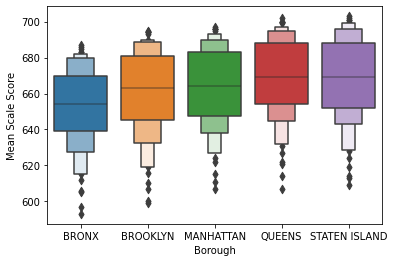

In [ ]:
sns.boxenplot(data = test, y= mss, x = 'Borough')


According to the Mann-Whittney test performed above, brooklyn and manhattan didnt have a significant diffierence. Nor did the Queens and Staten Island.  The result apears to be confirmed by the Box plot created. Where the median is similar for Brooklyn and Manhattan Boroughs. Same for Queens and Staten Island

The next focus will be STATEN ISLAND VS BRONX which has the largest difference in mediand according to the box plot  and has a U value of 3014.

Using both the Mann-whitney test and the box plot it becomes apparent tha students in BRONX scored significataly lower on the Math test than the other five boroughs. The cause of the lower scores will not be explored in this report.


BELOW are plots to help further analize the difference between Staten Island and the Bronx

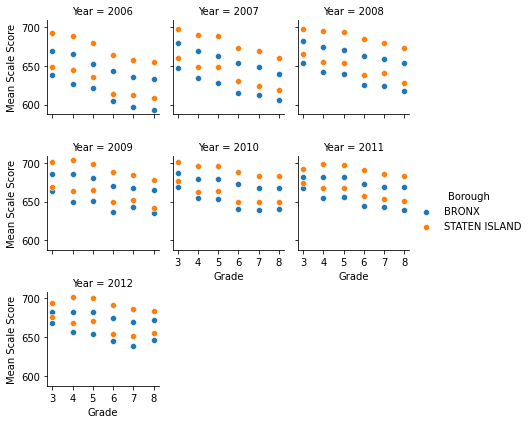

In [ ]:
g = sns.FacetGrid(col='Year', data =bronx_staten, hue='Borough',col_wrap= 3, height = 2)
g.map(sns.scatterplot, 'Grade', mss,)
g.add_legend()

After ploting the graphs above it appeared that while still scoring lower, the student in the bronx had started to make up the gap between them and those in Staten Island. 

In order to analize the difference, a individual T-test was used. While the data is not normally distributed which will cause some error in the results, it will still work as a decent side by side comparing the difference in scores between 2006-2010 and 2010-2012

In [ ]:
# Has the Bronx made a significant improvement in more recent years?
last_3_years = bronx_staten[(bronx_staten["Year"] == 2012 )| (bronx_staten['Year'] == 2011)| (bronx_staten['Year']== 2010)]
bronx_l3 = last_3_years[(last_3_years['Borough']=='BRONX')]
staten_l3 = last_3_years[(last_3_years['Borough']=='STATEN ISLAND')]
print(stats.ttest_ind(bronx_l3[mss], staten_l3[mss]))
print(stats.ttest_ind(bronx[mss],staten[mss]))
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


print(get_95_ci(bronx_l3[mss],staten_l3[mss]))
print(get_95_ci(bronx[mss],staten[mss]))
''' The 95% confidence interval has a closed about 2 points from 2010-2012 vs 2006-2010'''

Ttest_indResult(statistic=-3.3330052388537785, pvalue=0.001375496689063122)
Ttest_indResult(statistic=-4.250915913169802, pvalue=3.5432087874524195e-05)
The difference in means at the 95% confidence interval (two-tail) is between 5.378133212922536 and 20.73297789818855.
The difference in means at the 95% confidence interval (two-tail) is between 8.12233792757888 and 22.02051921527823.


' The 95% confidence interval has a closed about 2 points from 2010-2012 vs 2006-2010'

It appears that students in the bronx have slightly closed the gap in scored between them and students in Staten Island

# RESULTS 

Through a combination of visual inspections and test it was determined the data was not normally distributed. A krustal wallace test was conducted, returning a p-value of 3E^-5, the null hypothesis of no statiscally significant difference between the neighboorhoods was rejected

With further analysis through individual mann whitney test and a box plot  it was discovered that students in the bronx were scoring significantly lower on the math test than their peers in other neighboorhoods. The difference between the Bronx and State Island students was between 8 and 22 points, according to an individual T-test, which could suffer from some innaccuracy due to the non-normallity of the data being compared. 

# Recomendations  and Discussion 

Scores, on average, were significantly lower in the Bronx than other New York City neighborhoods. While scores in the Brox did improve slightly in more recent years(2010-2012), more research is needed. The next step in the process should be a more in depth look at individual schools in the bronx to look further into the lower averages. Other data such as average class size, money budgeted per student, and attendance might be useful for further analysis as to why the average scores are lower.